In [120]:
from pathlib import Path
import seaborn as sns
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from ff_energy.latex_writer.report import Report
from ff_energy.latex_writer.energydata.energy_data_report import EnergyReport
from ff_energy.latex_writer.figure import Figure
from ff_energy.latex_writer.format import safe_latex_string
from ff_energy.utils.ffe_utils import read_from_pickle, pickle_output

from ff_energy.ffe.ff import FF
from ff_energy.ffe.constants import PKL_PATH, PDB_PATH
from ff_energy.ffe.potential import LJ, LJ_bound, DE #, DE_bounds

from ff_energy.ffe.data import pairs_data
from ff_energy.plotting.data_plots import DataPlots


In [ ]:
# NONBONDED
# OG311    0.0       -0.192   1.765                  ! og MeOH and EtOH 1/06 (was -0.1521 1.7682)
# CG331    0.0       -0.078   2.050   0.0 -0.01 1.9 ! alkane (CT3), 4/98, yin, adm jr; Rmin/2 modified from 2.04 to 2.05
# HGP1     0.0       -0.046    0.225                 ! polar H
# HGA3     0.0       -0.024    1.340                 ! alkane, yin and mackerell, 4/98
# OT     0.00  -0.1521  1.7682 ! ALLOW   WAT
# HT     0.00  -0.0460  0.2245 ! ALLOW WAT
# CG321    0.0       -0.0560     2.0100   0.0 -0.01 1.9 ! alkane (CT2), 4/98, yin, adm jr, also used by viv
# CLGA1    0.0       -0.3430     1.9100 ! CLET, DCLE, chloroethane, 1,1-dichloroethane
# HGA2     0.0       -0.0240     1.3400 ! alkane, yin and mackerell, 4/98
# CLA      0.0       -0.150      2.27     ! Chloride
#                    ! D. Beglovd and B. Roux, dA=-83.87+4.46 = -79.40 kcal/mol
# POT      0.0       -0.0870    1.76375   ! Potassium
#                    ! D. Beglovd and B. Roux, dA=-82.36+2.8 = -79.56 kca/mol


In [2]:
test = next(read_from_pickle(PKL_PATH / "ELECp_dcm_lj.pkl"))

2023-09-14 12:28:23 | INFO | xla_bridge:backends:450 - Unable to initialize backend 'cuda': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
2023-09-14 12:28:23 | INFO | xla_bridge:backends:450 - Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
2023-09-14 12:28:23 | INFO | xla_bridge:backends:450 - Unable to initialize backend 'tpu': INVALID_ARGUMENT: TpuPlatform is not available.
2023-09-14 12:28:23 | INFO | xla_bridge:backends:450 - Unable to initialize backend 'plugin': xla_extension has no attributes named get_plugin_device_client. Compile TensorFlow with //tensorflow/compiler/xla/python:enable_plugin_device set to true (defaults to false) to enable this.
2023-09-14 12:28:23 | WARNING | xla_bridge:backends:458 - No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [3]:
test.debug_df["delta_sigma"] =  test.debug_df["sigmas"] - test.debug_df["sigmas2"]  #.describe() #.groupby("gname").sum().describe()

test.debug_df[ test.debug_df["delta_sigma"] > 0.001 ]

,group,es,akp,idx,gname,distances,sigmas,epsilons,sigmas2,epsilons2,jaxflat,delta_sigma


In [4]:
test.debug_df["sigmas"].unique()

array([2.13370387, 2.12961322, 2.34124302, 2.12552256, 2.33715237,
       2.54878218])

In [5]:
test.debug_df["epsilons"].unique()

array([0.85692802, 0.84588299, 0.85393354, 0.83498031, 0.8429271 ,
       0.85094952])

In [6]:
test.debug_df["sigmas2"].unique()

array([2.133704 , 2.1296134, 2.341243 , 2.1255226, 2.3371525, 2.548782 ],
      dtype=float32)

In [7]:
test.debug_df["epsilons2"].unique()

array([0.856928  , 0.84588295, 0.8539335 , 0.8349803 , 0.8429271 ,
       0.8509495 ], dtype=float32)

In [8]:
test.

In [29]:
test.debug_df[ test.debug_df["delta_sigma"] > 0.001 ]["epsilons2"].unique()

array([], dtype=float32)

In [30]:
test.debug_df[ test.debug_df["delta_sigma"] > 0.001 ]["sigmas2"].unique()

array([], dtype=float32)

In [31]:
test.debug_df[ test.debug_df["delta_sigma"] > 0.001 ]["epsilons"].unique()

array([], dtype=float64)

In [32]:
test.debug_df[ test.debug_df["delta_sigma"] > 0.001 ]["sigmas"].unique()

array([], dtype=float64)

(0.0, 10.0)

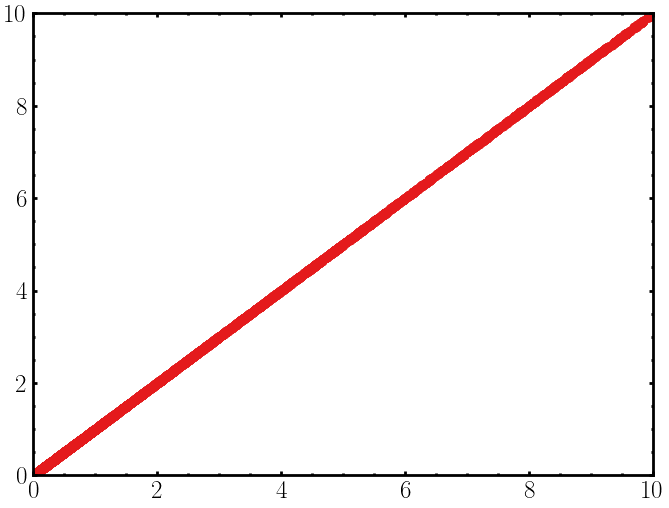

In [20]:
plt.scatter(test.debug_df["es"], test.debug_df["jaxflat"])
plt.xlim(0,10)
plt.ylim(0,10)

In [9]:
# plt.scatter(test.debug_df["distances"], test.debug_df["jaxflat"])

In [13]:
plt.hist(test.debug_df["es"] / test.debug_df["jaxflat"], bins=200000)

(array([4., 0., 0., ..., 0., 0., 2.]),
 array([-879.64803682, -879.6323568 , -879.61667677, ..., 2256.32554475,
        2256.34122477, 2256.3569048 ]),
 <BarContainer object of 200000 artists>)

Error in callback <function flush_figures at 0x7f0795e36670> (for post_execute):



KeyboardInterrupt



In [19]:
test.data

,TOTAL,ELEC,VDW,KEY,M_ENERGY,KEY,n_monomers,C_ENERGY,intE,P_intE,C_ENERGY_kcalmol,ELEC_CI,ELEC_POL,ELECpol,ELECci,ELECp,ELECm,ELECnull,DUMMY
100_1018_DCM_120_967,8.04068,-1.88784,-30.40458,100_1018_DCM_120_967,-19187.367411,100_1018_DCM_120_967,20,-19187.387191,-12.411790,-12.532116,-1.204014e+07,-20.567562,-1.421479,-21.599542,-20.567562,-1.88784,-5.55673,-0.0,0.0
100_1019_DCM_120_565,9.89488,-2.62215,-35.67010,100_1019_DCM_120_565,-19187.356685,100_1019_DCM_120_565,20,-19187.379774,-14.488511,-15.246951,-1.204014e+07,-28.837646,-2.050995,-30.129872,-28.837646,-2.62215,-7.65099,-0.0,0.0
100_1024_DCM_121_932,10.32904,-1.47130,-31.15835,100_1024_DCM_121_932,-19187.342979,100_1024_DCM_121_932,20,-19187.365864,-14.360149,-13.865660,-1.204013e+07,-16.497216,-1.404197,-17.508540,-16.497216,-1.47130,-4.03920,-0.0,0.0
100_1053_DCM_123_948,9.79551,-3.52281,-35.38260,100_1053_DCM_123_948,-19187.359041,100_1053_DCM_123_948,20,-19187.376685,-11.071544,-11.036796,-1.204014e+07,-34.970801,-1.757483,-36.197482,-34.970801,-3.52281,-8.05686,-0.0,0.0
100_1100_DCM_129_15,9.00233,-2.83638,-33.26086,100_1100_DCM_129_15,-19187.360730,100_1100_DCM_129_15,20,-19187.381994,-13.342866,-13.423951,-1.204014e+07,-38.877332,-2.678006,-40.843937,-38.877332,-2.83638,-9.75593,-0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100_979_DCM_115_117,10.52301,-1.09235,-29.25850,100_979_DCM_115_117,-19187.343536,100_979_DCM_115_117,20,-19187.363317,-12.412769,-12.238591,-1.204013e+07,-15.129841,-1.104415,-15.793819,-15.129841,-1.09235,-3.17565,-0.0,0.0
100_983_DCM_116_25,9.49413,-3.69630,-36.41305,100_983_DCM_116_25,-19187.339973,100_983_DCM_116_25,20,-19187.356356,-10.280112,-11.185809,-1.204012e+07,-44.367339,-2.568431,-46.111346,-44.367339,-3.69630,-10.24308,-0.0,0.0
100_986_DCM_116_989,10.93140,-3.39350,-30.97783,100_986_DCM_116_989,-19187.330647,100_986_DCM_116_989,20,-19187.349940,-12.106152,-12.100108,-1.204012e+07,-24.987267,-1.390889,-25.979675,-24.987267,-3.39350,-8.05472,-0.0,0.0
100_98_DCM_12_534,10.41278,-1.78878,-35.84975,100_98_DCM_12_534,-19187.337523,100_98_DCM_12_534,20,-19187.363902,-16.552713,-17.572315,-1.204013e+07,-38.295094,-2.656555,-40.165244,-38.295094,-1.78878,-9.19456,-0.0,0.0


<AxesSubplot:xlabel='VDW', ylabel='intE'>

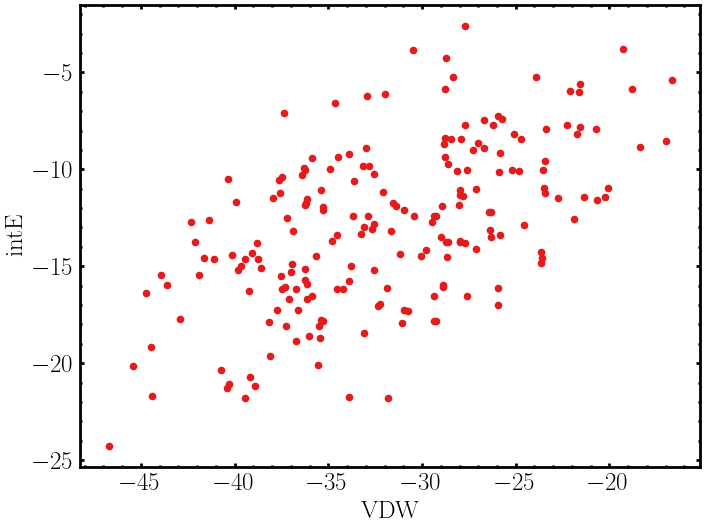

In [9]:
test.data.plot.scatter("VDW", "intE")

In [86]:
parms = [
            2.01, 1.9100, 1.340,
        -0.0560, -0.3430, -0.0240,
        ]

# parms = [
#             2.01, 1.340, 1.9100, 
#         -0.0560, -0.0240 , -0.3430,
#         ]

# parms = [
#             1.340, 2.01, 1.9100, 
#         -0.3430, -0.0560,  -0.0240,

#         ]

# parms = [
#             1.9100, 1.340, 2.01,  
#         -0.0240, -0.3430, -0.0560,  

#         ]

eval_cgenff = test.eval_jax(parms)

In [96]:
eval_cgenff[0]

Array([-30.331955, -37.75677 , -30.511642, -32.019936, -33.841618,
       -34.30552 , -27.97274 , -24.445364, -20.921299, -30.14459 ,
       -24.427063, -28.856915, -37.48755 , -31.720383, -31.76912 ,
       -37.55129 , -31.756544, -20.687592, -39.185738, -28.60117 ,
       -38.5154  , -34.468113, -25.745722, -23.027472, -30.220402,
       -35.08088 , -45.293015, -25.04704 , -25.8171  , -36.8731  ,
       -37.27352 , -20.063063, -28.377586, -32.73304 , -29.141687,
       -32.178703, -37.458904, -31.351353, -38.877007, -27.495968,
       -29.75855 , -40.04268 , -30.405945, -35.2497  , -28.002716,
       -38.761528, -34.77413 , -21.775414, -22.276289, -29.40649 ,
       -34.70015 , -38.674786, -25.483046, -40.273827, -27.71378 ,
       -46.797646, -35.577576, -32.539257, -41.01809 , -30.844566,
       -28.798267, -34.09513 , -48.035294, -45.673985, -34.705566,
       -23.118647, -40.2599  , -33.256374, -26.469858, -35.49514 ,
       -20.266409, -36.4033  , -26.086414, -16.086754, -35.339

DEBUG:matplotlib.backends.backend_pdf:Assigning font /b'F1' = b'cmsy10' (dvi)
2023-09-14 15:05:17 | DEBUG | backend_pdf:dviFontName:899 - Assigning font /b'F1' = b'cmsy10' (dvi)
DEBUG:matplotlib.backends.backend_pdf:Assigning font /b'F2' = b'cmr17' (dvi)
2023-09-14 15:05:17 | DEBUG | backend_pdf:dviFontName:899 - Assigning font /b'F2' = b'cmr17' (dvi)
DEBUG:matplotlib.backends.backend_pdf:Assigning font /b'F3' = b'cmss17' (dvi)
2023-09-14 15:05:17 | DEBUG | backend_pdf:dviFontName:899 - Assigning font /b'F3' = b'cmss17' (dvi)
DEBUG:matplotlib.backends.backend_pdf:Embedding Type-1 font b'cmr17' from dvi.
2023-09-14 15:05:17 | DEBUG | backend_pdf:writeFonts:913 - Embedding Type-1 font b'cmr17' from dvi.
DEBUG:matplotlib.backends.backend_pdf:Embedding TeX font b'cmr17' - fontinfo={'dvifont': <DviFont: b'cmr17'>, 'pdfname': <Name b'F2'>, 'fontfile': '/usr/share/texlive/texmf-dist/fonts/type1/public/amsfonts/cm/cmr17.pfb', 'basefont': b'CMR17', 'encodingfile': None, 'effects': {}}
2023-09-1

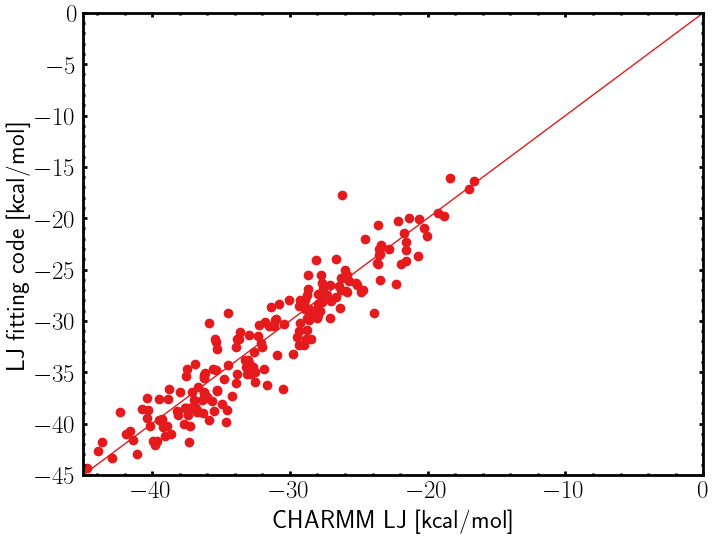

In [114]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'

plt.scatter(test.data["VDW"], eval_cgenff[0])
plt.xlim(-45, 0)
plt.ylim(-45, 0)
plt.plot([-45, 0], [-45, 0])
plt.ylabel("LJ fitting code [kcal/mol]")
plt.xlabel("CHARMM LJ [kcal/mol]")

np.mean((test.data["VDW"] - eval_cgenff[0])**2)**0.5
plt.savefig("230914_dcm_charmm_LJ.pdf", bbox_bounds="tight")

DEBUG:matplotlib.backends.backend_pdf:Assigning font /b'F1' = b'cmsy10' (dvi)
2023-09-14 15:14:24 | DEBUG | backend_pdf:dviFontName:899 - Assigning font /b'F1' = b'cmsy10' (dvi)
DEBUG:matplotlib.backends.backend_pdf:Assigning font /b'F2' = b'cmr17' (dvi)
2023-09-14 15:14:24 | DEBUG | backend_pdf:dviFontName:899 - Assigning font /b'F2' = b'cmr17' (dvi)
DEBUG:matplotlib.backends.backend_pdf:Assigning font /b'F3' = b'cmss17' (dvi)
2023-09-14 15:14:24 | DEBUG | backend_pdf:dviFontName:899 - Assigning font /b'F3' = b'cmss17' (dvi)
DEBUG:matplotlib.backends.backend_pdf:Embedding Type-1 font b'cmr17' from dvi.
2023-09-14 15:14:24 | DEBUG | backend_pdf:writeFonts:913 - Embedding Type-1 font b'cmr17' from dvi.
DEBUG:matplotlib.backends.backend_pdf:Embedding TeX font b'cmr17' - fontinfo={'dvifont': <DviFont: b'cmr17'>, 'pdfname': <Name b'F2'>, 'fontfile': '/usr/share/texlive/texmf-dist/fonts/type1/public/amsfonts/cm/cmr17.pfb', 'basefont': b'CMR17', 'encodingfile': None, 'effects': {}}
2023-09-1

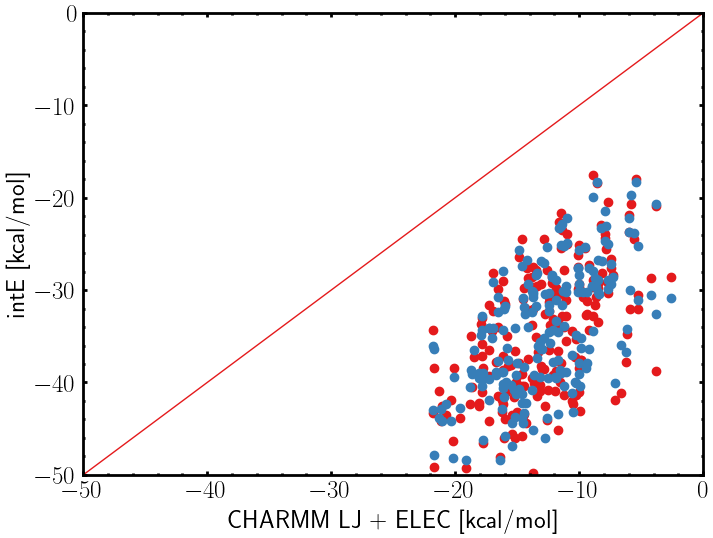

In [117]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'

plt.scatter(test.data["intE"] , eval_cgenff[0] + test.data["ELECp"])
plt.scatter(test.data["intE"] , test.data["VDW"] + test.data["ELECp"])

min_lim = -50

plt.xlim(min_lim, 0)
plt.ylim(min_lim, 0)
plt.plot([min_lim, 0], [min_lim, 0])
plt.ylabel("intE [kcal/mol]")
plt.xlabel("CHARMM LJ + ELEC [kcal/mol]")

np.mean((test.data["VDW"] - eval_cgenff[0])**2)**0.5
plt.savefig("230914_dcm_charmm_LJ_ELEC_comparison.pdf", bbox_bounds="tight")

2.117648479205634

In [119]:
# test.out_groups

In [118]:
# plt.plot(list(range(len(test.out_akps))), test.out_akps)

In [49]:
6//3


2

In [50]:
6.0//3

2.0